In [1]:
# oncelikle kullancagimiz kutuphaneler eklenmeli
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn

# **Keşifsel Veri Analizi Yapılması**

In [3]:
# .csv dosyaası formatında olan verimize ulaşalımç
data = pd.read_csv("insurance.csv")

In [ ]:
"""
     istersek kolon isimlerini bu şekilde değiştirebiliriz.
# kolon isimlerini değiştirelim
df = df.rename(columns = {"age" : "yas",
                      "sex" : "cinsiyet",
                      "bmi" : "VKI",
                      "children" : "cocuk ",
                      "smoker" : "sigara ",
                      "region" : "memleket",
#                     "charges" : " masraflar"})
"""

In [4]:
print(f"satır sayısı: {data.shape[0]}, kolon sayısı: {data.shape[0]}")
print("boyut = ", data.shape)
print("sutunlar = ", data.columns)
print("axes = ", data.axes)

satır sayısı: 1338, kolon sayısı: 1338
boyut =  (1338, 7)
sutunlar =  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
axes =  [RangeIndex(start=0, stop=1338, step=1), Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')]


In [5]:
# veri setindeki ilk 5 satırı yazdıralım
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
# betimleyici istatistikler
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [7]:
"""
veri setinde bulunan male, female gibi string ifadeler kodun ilerleyen kısımlarında tablo oluştururken sorun yaratabilir, bu yüzden formatlarını değiştirelim.
aynı zamanda charges ve bmi verilerinin float olması da karışıklığa yol açacaktır, bu yüzden bence float değil integer versiyonlarını kullanmak daha verimli bir yol.
"""
gender = {"male" : 0, "female" : 1}
smoker = {"yes": 1, "no" : 0}
region = {"southeast": 0, "southwest" : 1, "northeast" : 2, "northwest" : 3}
data.smoker = [ smoker[i] for i in data.smoker]
data.sex = [ gender[item] for item in data.sex]
data.region = [ region[k] for k in data.region]

data['charges'] = data['charges'].astype(int)
data['bmi'] = data['bmi'].astype(int)
print(data.head())

   age  sex  bmi  children  smoker  region  charges
0   19    1   27         0       1       1    16884
1   18    0   33         1       0       0     1725
2   28    0   33         3       0       0     4449
3   33    0   22         0       0       3    21984
4   32    0   28         0       0       3     3866


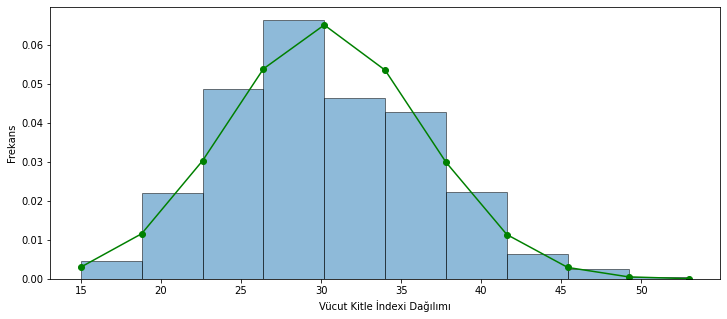

In [8]:
plt.figure(figsize=(12,5))
# Histogram plot parametreleri
_, bins, _ = plt.hist(data.bmi, bins = 10,
                      density = 1, alpha = 0.5,
                      ec= 'black' )
# Bbins = 10 olması grafiği 10 ayrı parçaya bölerek frekans yoğunluğunu göstermiştir.

# Çan eğrisi için en uygun değerler
mu, sigma = stats.norm.fit(data.bmi)
best_fit_line = stats.norm.pdf(bins, mu, sigma)

# Çan eğrisi gösterimi
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("Vücut Kitle İndexi Dağılımı")
plt.ylabel("Frekans")
plt.show()

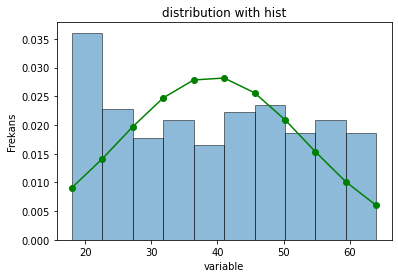

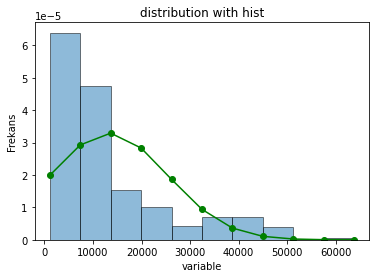

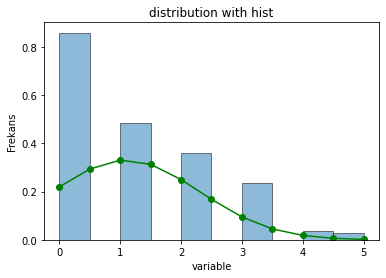

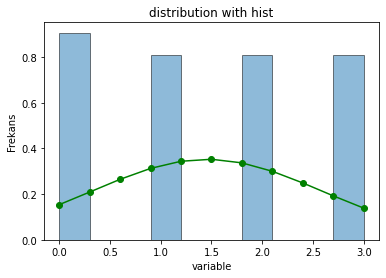

In [9]:
# istediğimiz değişkenin histogram tablosunu hemen yazdırmak için bir histogram fonksiyonu oluşturabiliriz.
def plot_hist(variable):
    _, bins, _ = plt.hist(variable, bins = 10,
                      density = 1, alpha = 0.5,
                      ec= 'black' )
    mu, sigma = stats.norm.fit(variable)
    best_fit_line = stats.norm.pdf(bins, mu, sigma)
    plt.plot(bins, best_fit_line, 'g-o')
    plt.xlabel("variable")
    plt.ylabel("Frekans")
    plt.title("distribution with hist")
    plt.show()

plot_hist(data.age)
plot_hist(data.charges)
plot_hist(data.children)
plot_hist(data.region)

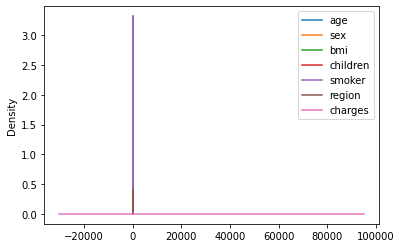

In [10]:
"""
KDE: Kernel Density Estimation
Elimizdeki verilerden elde edilmiş bir histogramin dogrusallaştırılmış halidir.
Pandas kütüphanesi içinde KDE görselleştirmesi yapılabilir.
"""

data.plot.kde()

# değişkenleri normalize etmediğimiz için okunabilir bir grafik oluşamaz.

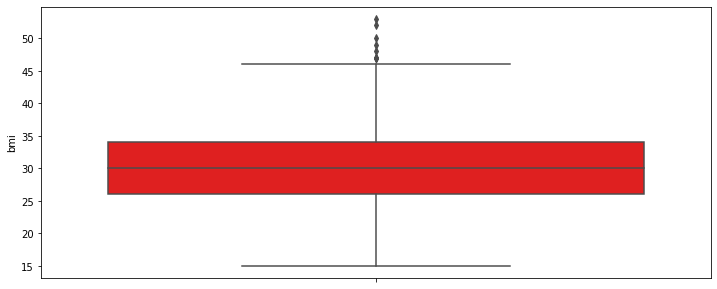

In [11]:
plt.figure(figsize=(12,5))
sns.boxplot(y='bmi',data=data, color  = 'r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


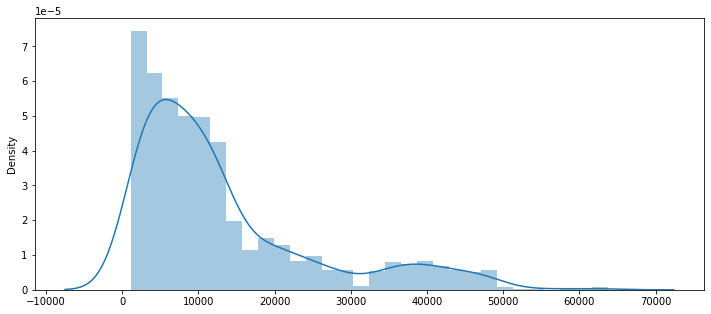

In [12]:
# charges verisinin dağılımı
plt.figure(figsize=(12,5))
sns.distplot(x=data['charges'])
plt.show()




---



---



*   “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz
*   “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.


---



---




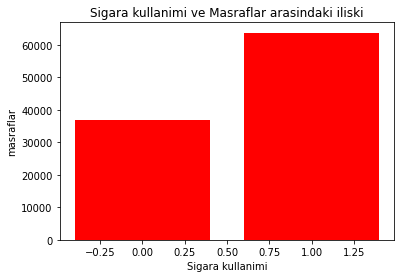

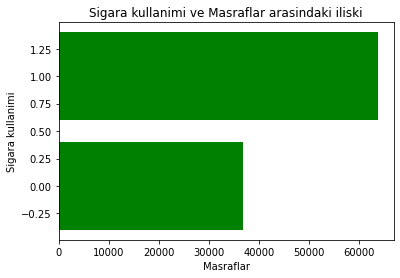

In [13]:
"""
ADIM ADIM VERI GORSELLESTIRME
"""
# Simple Bar Plot
plt.bar(data.smoker, data.charges, color = 'r')
plt.xlabel('Sigara kullanimi')
plt.ylabel("masraflar")
plt.title('Sigara kullanimi ve Masraflar arasindaki iliski')
plt.show()

# Horizontal Bar plot
plt.barh(data.smoker, data.charges,  color = 'g')
plt.xlabel("Masraflar")
plt.ylabel('Sigara kullanimi')
plt.title('Sigara kullanimi ve Masraflar arasindaki iliski')
plt.show()

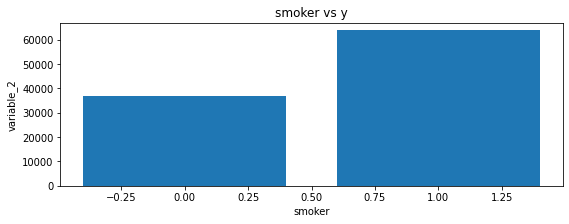

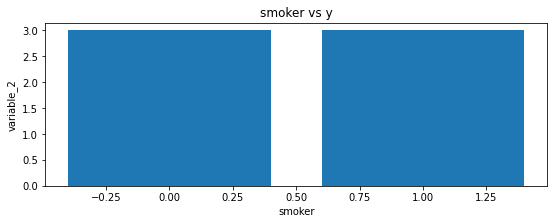

 smoker vs charges 
    smoker       charges
1       1  32049.726277
0       0   8433.778195
 smoker vs region 
    smoker    region
0       0  1.486842
1       1  1.335766


In [14]:
# histograma yaptığımız gibi bunu da fonksiyon haline getirbiliriz.

def bar_plot(variable_1, variable_2):
    plt.figure(figsize=(9,3))
    plt.bar(variable_1, variable_2)
    plt.xlabel("smoker")
    plt.ylabel("variable_2")
    plt.title("smoker vs y")
    plt.show()
    
bar_plot(data.smoker, data.charges)
bar_plot(data.smoker, data.region)

smokervscharges = data[["smoker","charges"]].groupby(["smoker"], as_index= False).mean().sort_values(by="charges", ascending=False)
smokervsregion = data[["smoker","region"]].groupby(["smoker"], as_index= False).mean().sort_values(by="region", ascending=False)
print(" smoker vs charges \n", smokervscharges)
print(" smoker vs region \n", smokervsregion)

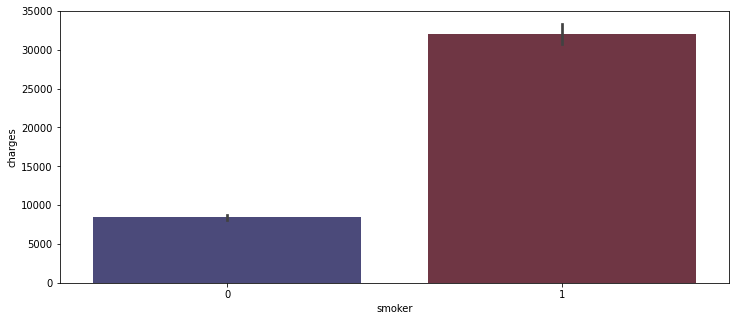

In [15]:
# ya da seaborn kütüphanesi kullanılarak daha iyi görselleştirilmiş bir tablo oluşturulabilir.
plt.figure(figsize=(12,5))
sns.barplot(y='charges',x='smoker',data=data, palette="icefire");

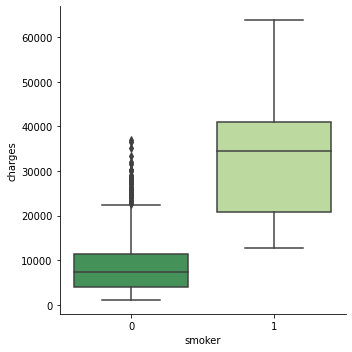

In [16]:
sns.catplot(x="smoker", y="charges", data=data, kind="box", palette="YlGn_r")

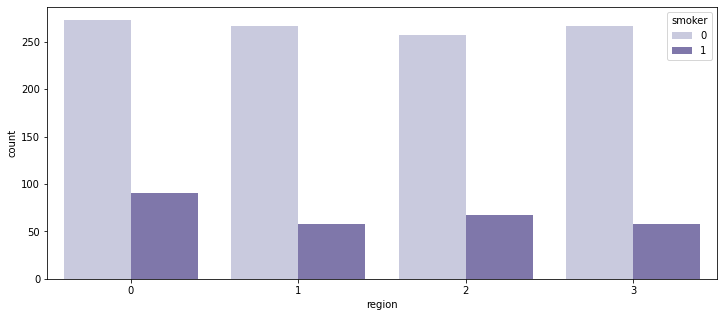

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(x="region", hue="smoker", data=data, palette = 'Purples');

In [18]:
data.groupby(["region","smoker"]).size().reset_index(name="count")

,region,smoker,count
0,0,0,273
1,0,1,91
2,1,0,267
3,1,1,58
4,2,0,257
5,2,1,67
6,3,0,267
7,3,1,58


In [19]:
data_2 = pd.read_csv("insurance.csv")
region_vs_smoker=data_2.groupby(["region","smoker"]).agg(Smoker_count=("smoker","count")).reset_index()
region_vs_smoker

,region,smoker,Smoker_count
0,northeast,no,257
1,northeast,yes,67
2,northwest,no,267
3,northwest,yes,58
4,southeast,no,273
5,southeast,yes,91
6,southwest,no,267
7,southwest,yes,58


In [20]:
from plotly import express as px
figure = plt.figure(figsize=(12,5))
trace0=px.sunburst(region_vs_smoker,path=["region","smoker"],values="Smoker_count")
trace0.update_layout(title="Region Vs. Smokers.",title_x=0.5,showlegend=True)
trace0.show()

<Figure size 864x360 with 0 Axes>



---

*   “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.

---



In [21]:
data[["bmi","sex"]].groupby(["sex"], as_index= False).mean().sort_values(by="bmi", ascending=False)

,sex,bmi
0,0,30.451183
1,1,29.882175


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'VKI Erkek dagilimi')

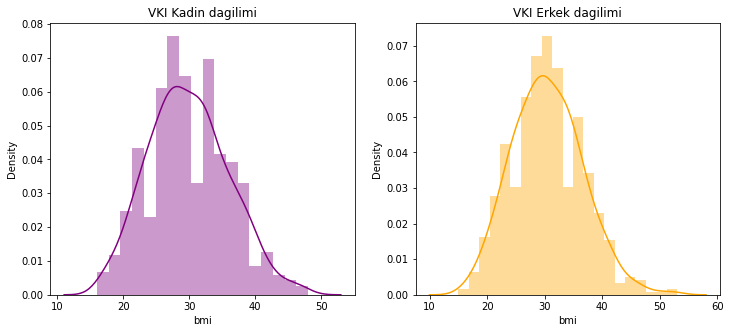

In [22]:

figure = plt.figure(figsize=(12,5))

ax = figure.add_subplot(121)
sns.distplot(data[(data.sex == 1)]["bmi"],color='purple',ax=ax)
ax.set_title('VKI Kadin dagilimi')

ax = figure.add_subplot(122)
sns.distplot(data[(data.sex == 0)]['bmi'],color='orange',ax=ax)
ax.set_title('VKI Erkek dagilimi')



---
*   En çok “children”’a sahip “region”’ı bulunuz.
---




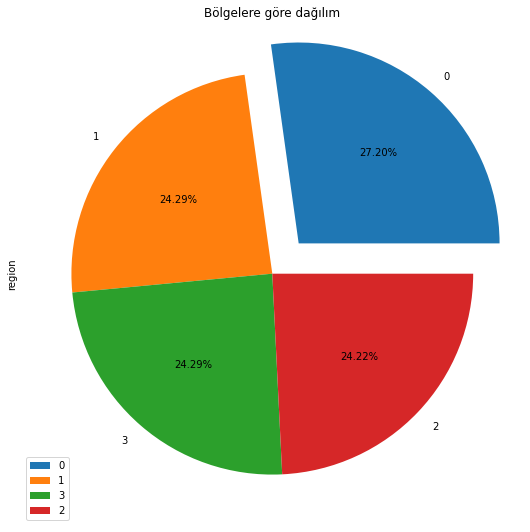

In [23]:
"""
PIE CHART
"""
plt.figure(figsize=(9,9.5))
data['region'].value_counts().plot(kind='pie',explode=[0.2,0,0,0],legend=True,autopct='%.2f%%')
plt.title('Bölgelere göre dağılım')
plt.show()

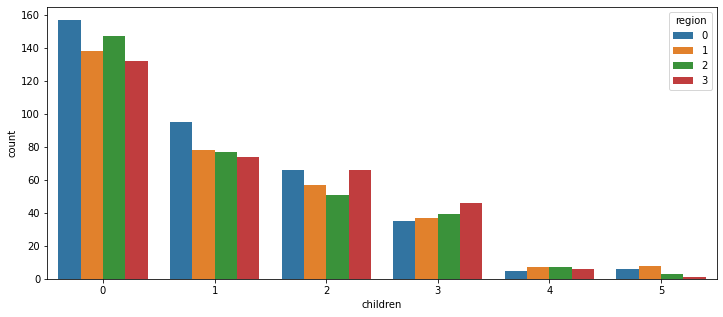

In [24]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x="children",hue="region", data=data)

region
0    382
1    371
2    339
3    373
Name: children, dtype: int64


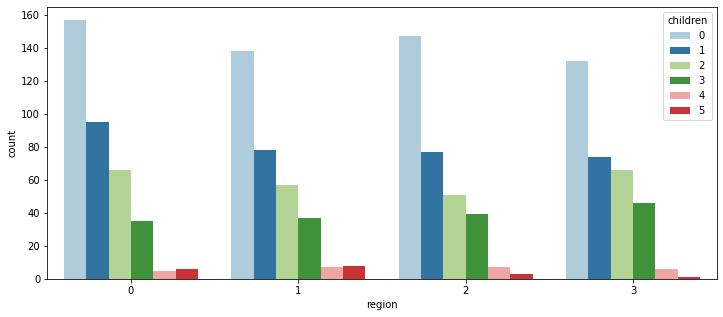

In [25]:
children_count = data.groupby("region")["children"].sum()
print(children_count)

plt.figure(figsize=(12,5))
sns.countplot(x="region", hue="children", data=data, palette="Paired")

In [26]:
from plotly import express as px
data_2 = pd.read_csv("insurance.csv")
children_vs_region = data_2.groupby(["children","region"]).agg(region_count=("region","count")).reset_index()

figure = plt.figure(figsize=(12,5))
trace0=px.sunburst(children_vs_region ,path=["children","region"],values="region_count")
trace0.update_layout(title="Children Vs. Region.",title_x=0.5,showlegend=True)
trace0.show()

<Figure size 864x360 with 0 Axes>


*   üstteki tablolara göre en çok çocuk sahibi olan region 0 yani "southeast" gibi görünüyor.





---
*   Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.
---



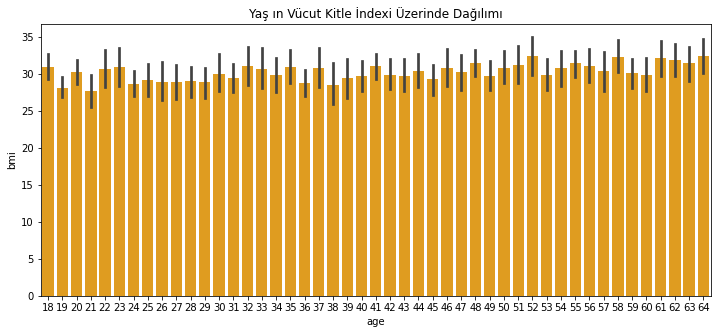

In [27]:
plt.figure(figsize=(12,5))
plt.title("Yaş ın Vücut Kitle İndexi Üzerinde Dağılımı")
sns.barplot(y='bmi',x='age',data=data, color = "orange");

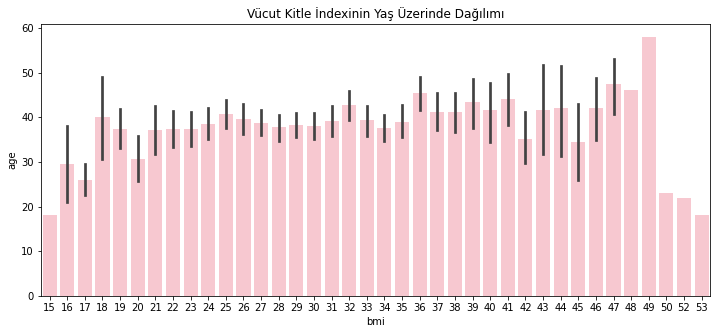

In [28]:
plt.figure(figsize=(12,5))
plt.title("Vücut Kitle İndexinin Yaş Üzerinde Dağılımı")
sns.barplot(y='age',x='bmi',data=data, color = "pink");

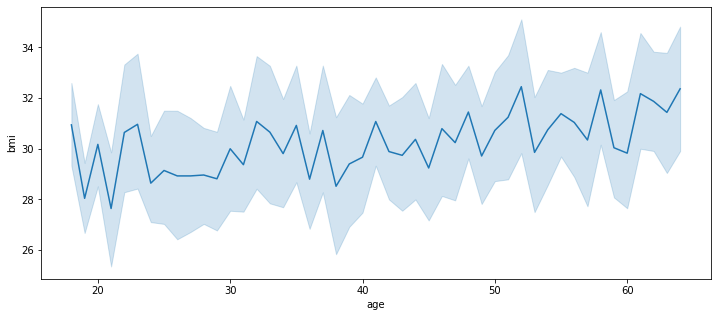

In [29]:
plt.figure(figsize=(12,5))
sns.lineplot(x="age", y="bmi", data=data)



---



*   “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.




---



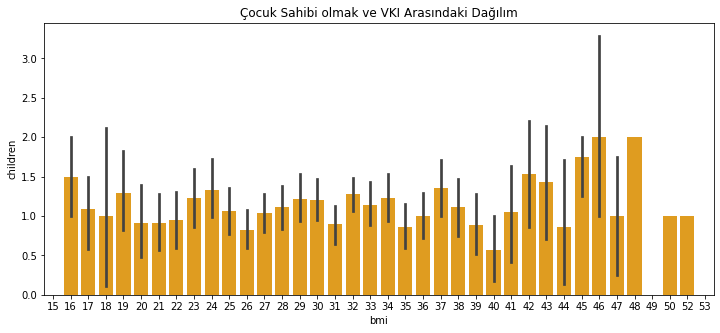

In [30]:
plt.figure(figsize=(12,5))
plt.title("Çocuk Sahibi olmak ve VKI Arasındaki Dağılım")
sns.barplot(y='children',x='bmi',data=data, color = "orange");

<Figure size 864x360 with 0 Axes>

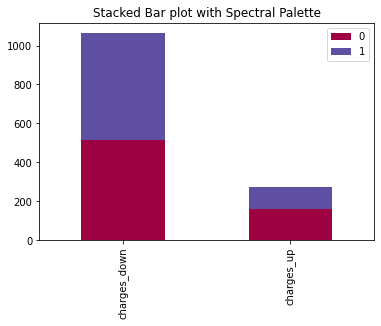

In [31]:
plt.figure(figsize=(12,5))
# Asagida masraflarin arttigi ve azaldigi durumlar, sigara icme durumu ve cinsiyete gore tablolastirilmistir
charges_down   = data.loc[data['smoker'] == 0, :]['sex'].value_counts()
charges_up     = data.loc[data['smoker'] == 1, :]['sex'].value_counts()
df_plot  = pd.DataFrame([charges_down, charges_up ])
df_plot.index=['charges_down','charges_up']

# Bar plot
df_plot.plot(kind='bar',stacked=True, colormap='Spectral', title='Stacked Bar plot with Spectral Palette');



---


“bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.

---



Text(0.5, 1.0, 'vucut kitle indexi ve masraflarin dagilimi')

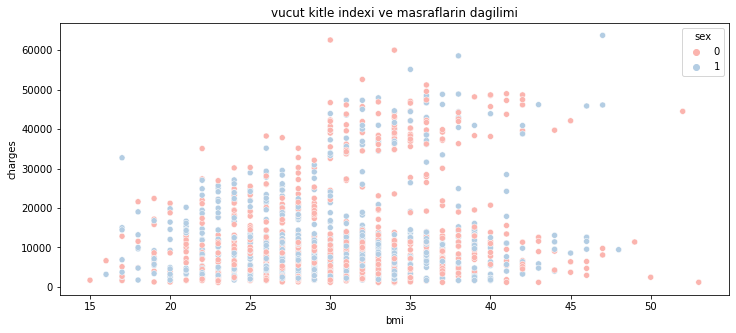

In [32]:
plt.figure(figsize=(12,5))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='Pastel1',hue='sex')
ax.set_title('vucut kitle indexi ve masraflarin dagilimi')



---

“region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.


---



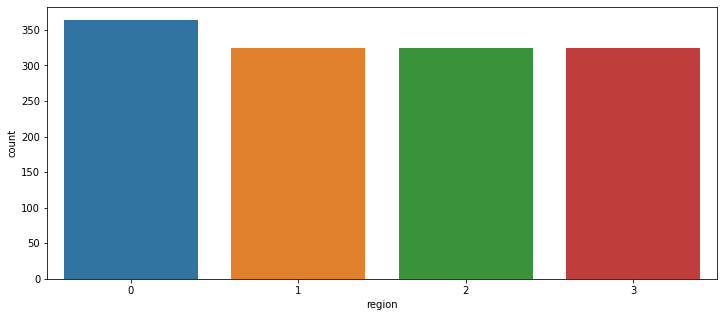

In [33]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x="region", data=data)

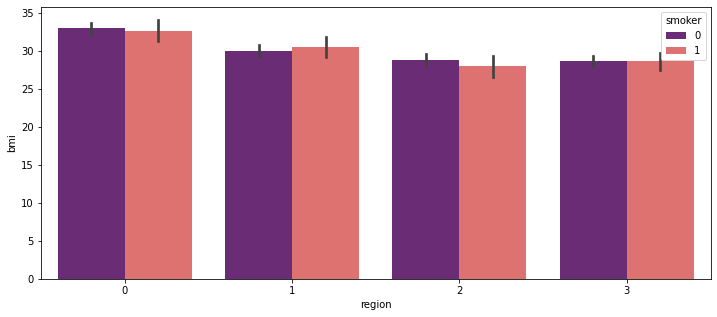

In [34]:
# seaborn kutuphanesi kullanilarak 3 kategorili bir grup tablosu olusturuldu.
plt.figure(figsize=(12,5))
sns.barplot(y='bmi',x='region',hue='smoker',data=data, palette = "magma");



---
**Datasetin tamamı asagidaki gibi ceşitli data visualisation yöntemleriyle analiz edildi.**

---



<Figure size 864x360 with 0 Axes>

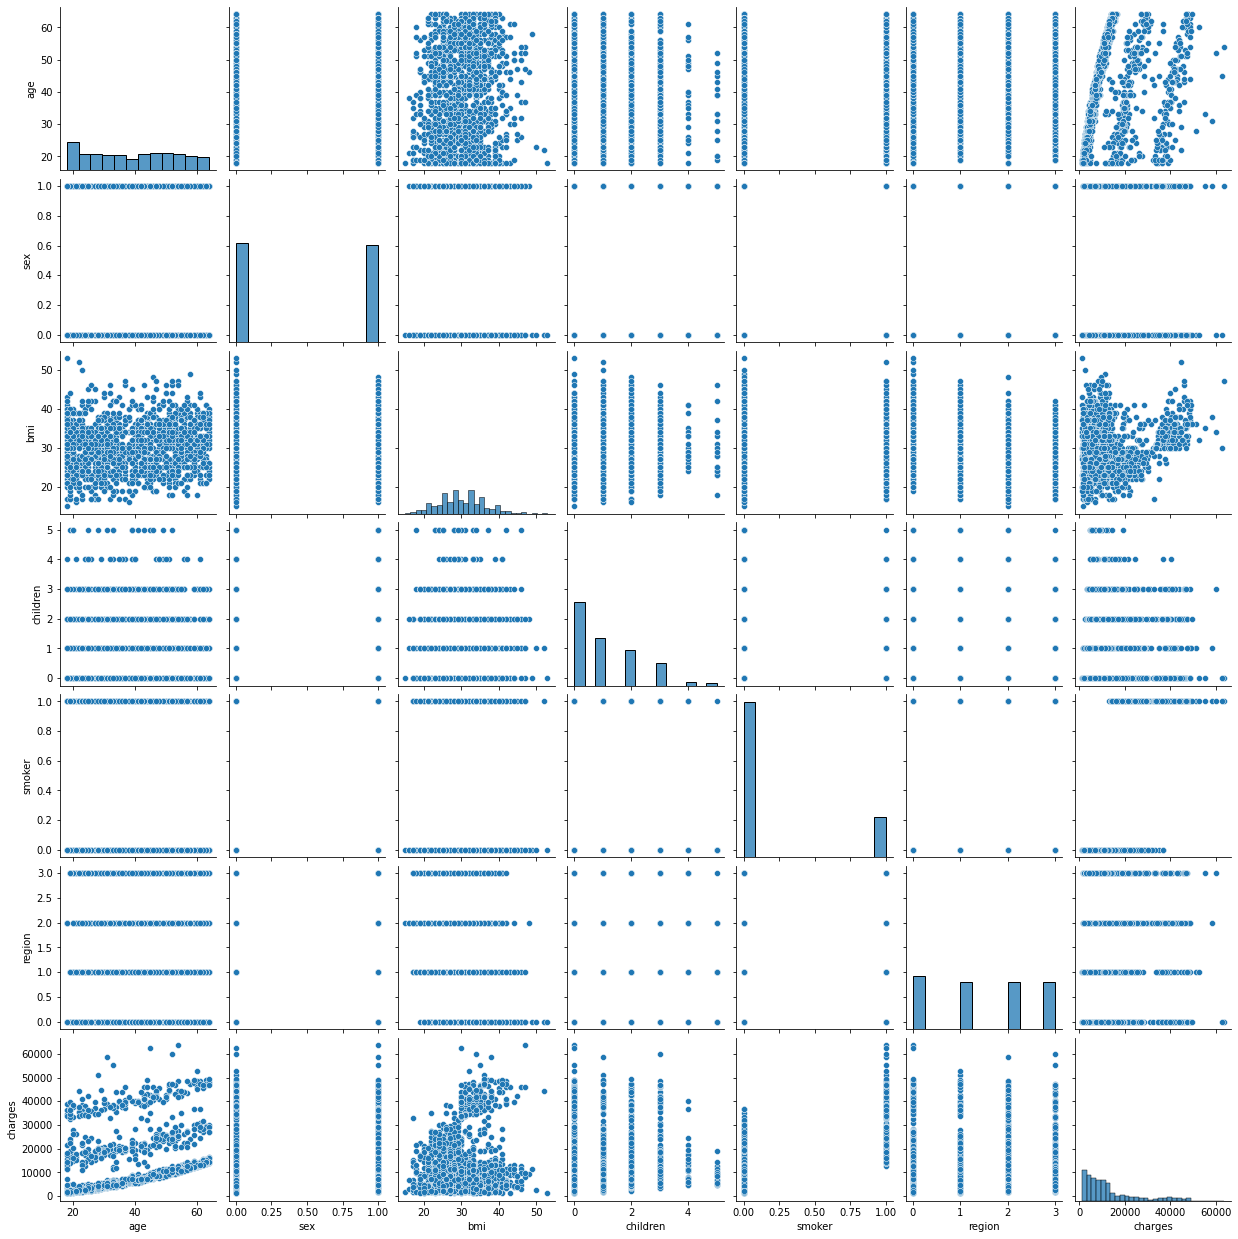

In [35]:
plt.figure(figsize=(12,5))
sns.pairplot(data )

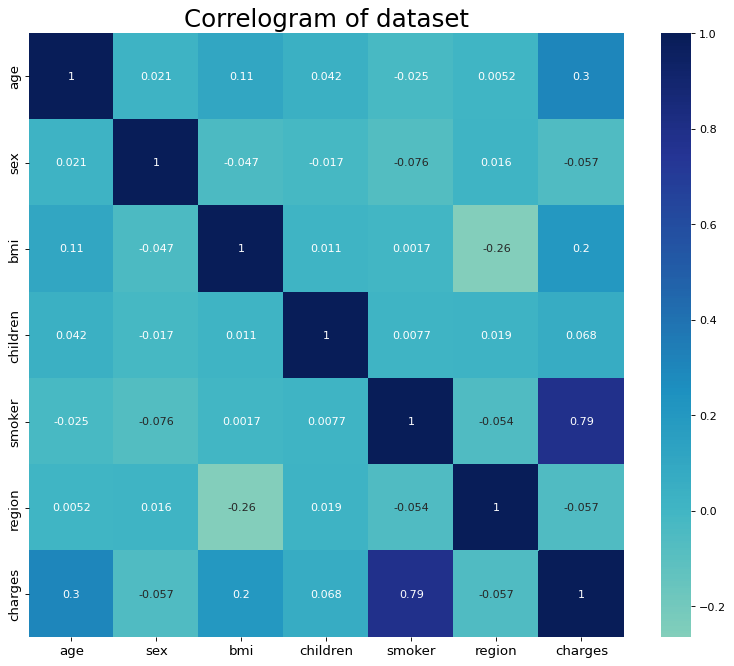

In [36]:

plt.figure(figsize = (12, 10), dpi = 80)
sns.heatmap(data.corr(), xticklabels = data.corr().columns, yticklabels = data.corr().columns, cmap = 'YlGnBu', center = 0, annot = True)

# Decorations
plt.title('Correlogram of dataset', fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

<Figure size 864x360 with 0 Axes>

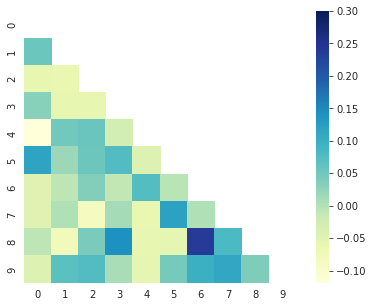

In [37]:
plt.figure(figsize=(12,5))
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="YlGnBu")

<Figure size 864x360 with 0 Axes>

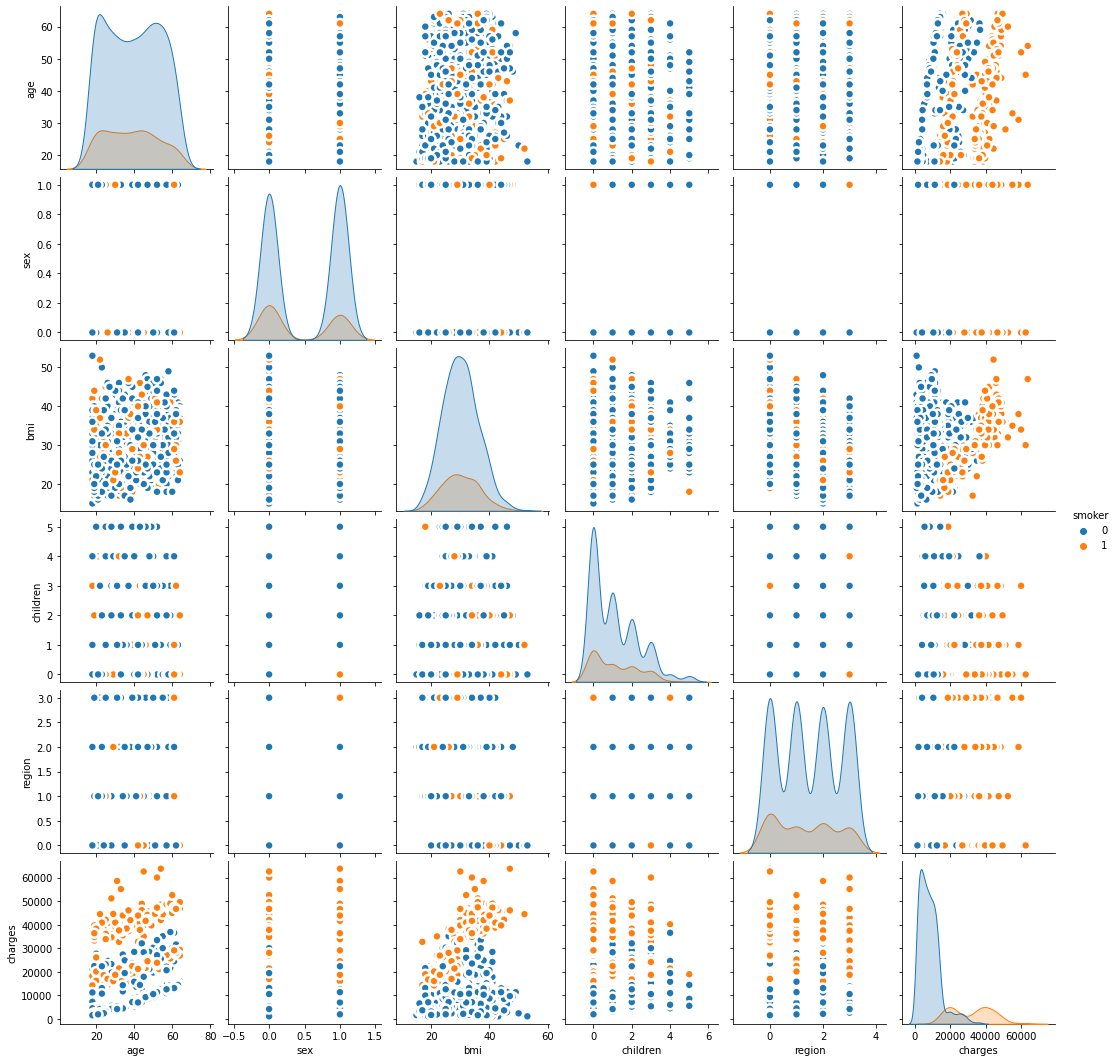

In [38]:
plt.figure(figsize=(12,5))
sns.pairplot(data, kind="scatter", hue="smoker", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 864x360 with 0 Axes>

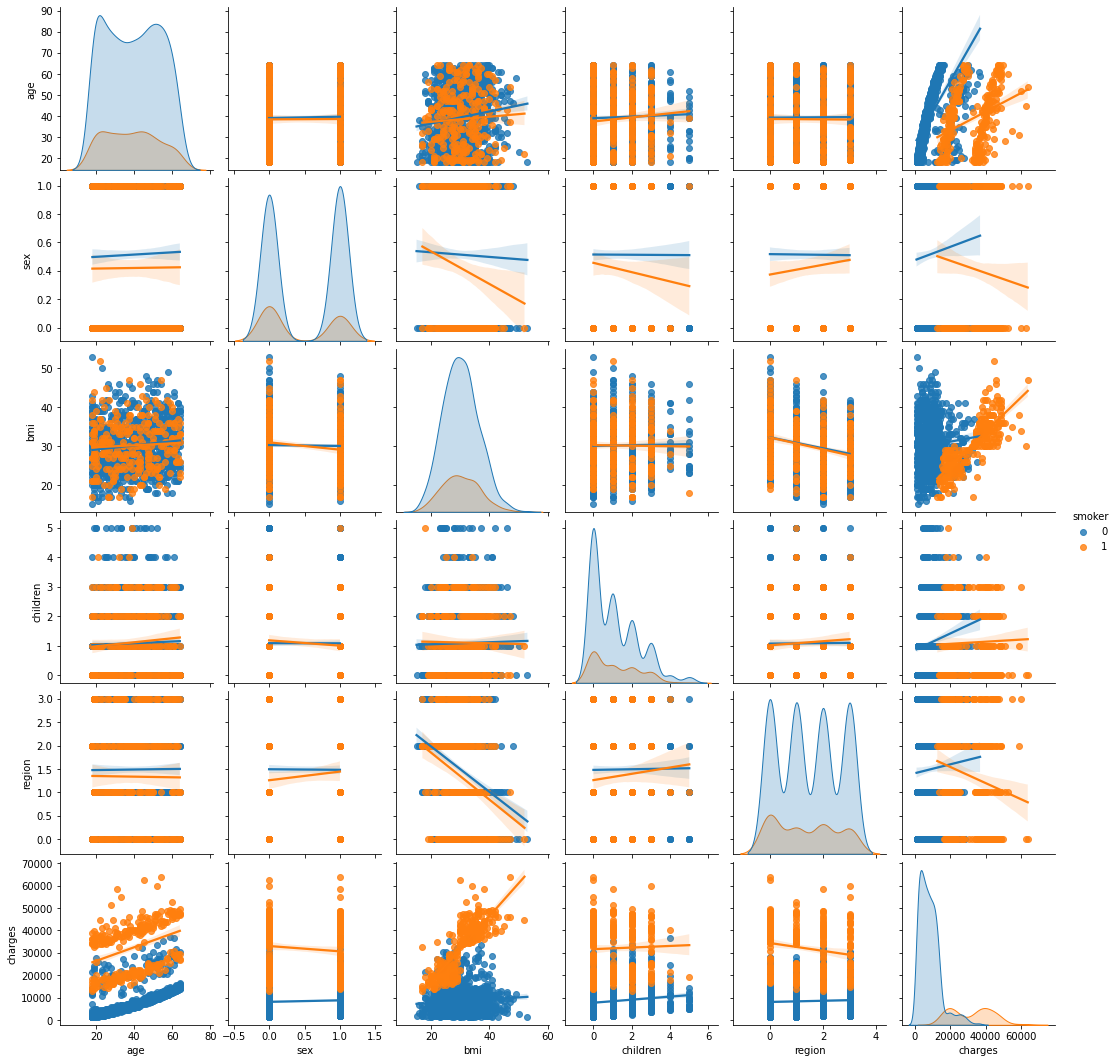

In [39]:
# Plot
plt.figure(figsize=(12,5))
sns.pairplot(data, kind="reg", hue="smoker")
plt.show()

In [40]:
data_2 = pd.read_csv("insurance.csv")
gender_vs_smoker=data_2.groupby(["sex","smoker"]).agg(Smoker_count=("smoker","count")).reset_index()
gender_vs_smoker

,sex,smoker,Smoker_count
0,female,no,547
1,female,yes,115
2,male,no,517
3,male,yes,159


In [41]:
from plotly import express as px
plt.figure(figsize=(12,5))
trace0=px.sunburst(gender_vs_smoker,path=["sex","smoker"],values="Smoker_count")
trace0.update_layout(title="Gender Vs. Smokers.",title_x=0.5,showlegend=True)
trace0.show()

<Figure size 864x360 with 0 Axes>

# One Hot Encoding

In [ ]:
'''
Farkli kategorilerdeki verileri train datasina katmadan once encode etmemiz gerekir. Bu gibi durumlarda 2 yontem vardir:
  Eger veriler arasinda herhangi ir hiyerarsi varsa Label Encoder kullanilir.
  Hiyerarsi yoksa One Hot Encoder kullanilabilir

  Yani; sex, smoker ve region gibi veriler arasinda bir hiyerarsi olmadigi icin bu datasette One Hot Encoding yontemini kullanabiliriz.
'''

In [42]:
# pandas kutuphanesinin get_dummies fonksiyonu TensorFlow"un OneHotEncoder fonksiyonundan daha kolay oldugu icin onu kullanalim.

encoded_data = pd.get_dummies(data = data, columns=["sex", "smoker", "region"])
encoded_data.head()

,age,bmi,children,charges,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27,0,16884,0,1,0,1,0,1,0,0
1,18,33,1,1725,1,0,1,0,1,0,0,0
2,28,33,3,4449,1,0,1,0,1,0,0,0
3,33,22,0,21984,1,0,1,0,0,0,0,1
4,32,28,0,3866,1,0,1,0,0,0,0,1


In [43]:
"""
Train ve Test verilerine ayirmadan once son olarak BMI degiskeninde OUTLIER var mi? inceleyelim.
"""
# BMI verilerini alalim
sorted_bmi = encoded_data["bmi"].sort_values()

# Q1, Q2, Q3 ve IQR degerlerini hesaplayalim
Q1 = np.percentile(sorted_bmi, 25, interpolation = 'midpoint') 
Q2 = np.percentile(sorted_bmi, 50, interpolation = 'midpoint') 
Q3 = np.percentile(sorted_bmi, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the BMI values is, ', Q1)
print('Q1 50 percentile of the BMI values is, ', Q2)
print('Q1 75 percentile of the BMI values is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the BMI values is,  26.0
Q1 50 percentile of the BMI values is,  30.0
Q1 75 percentile of the BMI values is,  34.0
Interquartile range is 8.0


In [44]:
# Q1 – 1.5 IQR ve Q3 + 1.5 IQR gibi alt ve ust limitleri hesaplayalim.
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is 14.0
up_limit is 46.0


In [45]:
# datasetimizdeki outlier"lari bulalim:
outliers =[]
for x in sorted_bmi:
    if ((x> up_lim) or (x<low_lim)):
         outliers.append(x)
print(' Outliers in the dataset is', outliers)

 Outliers in the dataset is [47, 47, 47, 47, 48, 49, 50, 52, 53]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



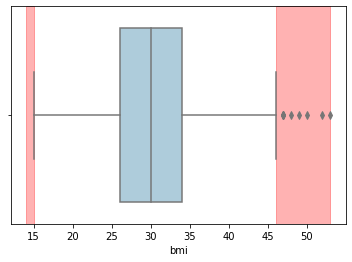

In [46]:
# boxplot daki outlier alanlarini kirmiziyla gosterelim
sns.boxplot(sorted_bmi, palette="Paired")
plt.axvspan(xmin = low_lim, xmax = sorted_bmi.min(), alpha=0.3, color='red')
plt.axvspan(xmin = up_lim, xmax = sorted_bmi.max(), alpha=0.3, color='red')

In [47]:
# outlier verilerini datasetimizden ayiralim
clean_data = encoded_data[encoded_data["bmi"] < 47.41]
clean_data

,age,bmi,children,charges,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27,0,16884,0,1,0,1,0,1,0,0
1,18,33,1,1725,1,0,1,0,1,0,0,0
2,28,33,3,4449,1,0,1,0,1,0,0,0
3,33,22,0,21984,1,0,1,0,0,0,0,1
4,32,28,0,3866,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,0,0,0,0,1
1334,18,31,0,2205,0,1,1,0,0,0,1,0
1335,18,36,0,1629,0,1,1,0,1,0,0,0
1336,21,25,0,2007,0,1,1,0,0,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



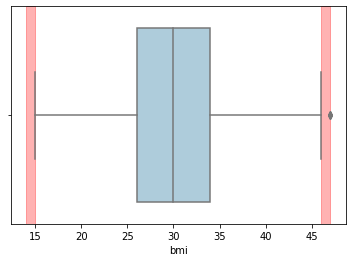

In [48]:
# outlierlari tekrar bir grafikte yazdirarak kontrol edelim
sns.boxplot(clean_data["bmi"].sort_values(), palette="Paired")
plt.axvspan(xmin = low_lim, xmax = clean_data["bmi"].sort_values().min(), alpha=0.3, color='red')
plt.axvspan(xmin = up_lim, xmax = clean_data["bmi"].sort_values().max(), alpha=0.3, color='red')

# Veri Setini Train ve Test olarak Ayırma

In [49]:
'''
SON OLARAK:
Veri setini Train ve Test olarak ayiralim
'''
from sklearn.model_selection import train_test_split

# bagimli degisken olan (y: "charges") ve bagimsiz olan (X: other features) verilerini birbirinden ayirali
x = clean_data.drop(["charges"], axis=1)
y = clean_data["charges"]

# x ve y verilerini train_test_split fonksiyonuyla train ve test verilerine ayiralim
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

# ayrilmis veriyi kontrol edelim
print(x_train.ndim, x_test.ndim, y_train.ndim, y_test.ndim)
print("")
print(type(x_train),type(x_test),type(y_train),type(y_test))

# veriyi dataframae"e donusturelim
y_train = y_train.to_frame()
y_test = y_test.to_frame()

2 2 1 1

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [50]:
'''
SCALING DATA
'''
# daha iyi model performansina ulasabilmek icin veriyi olceklendirelim
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in [x_train, x_test, y_train, y_test]:
  scaler.fit_transform(i)
  print(scaler.mean_)

[38.88102894 30.1511254   1.09539121  0.50267953  0.49732047  0.79849946
  0.20150054  0.26580922  0.25723473  0.24115756  0.2357985 ]
[40.04   29.96    1.0975  0.5075  0.4925  0.7875  0.2125  0.28    0.2125
  0.245   0.2625]
[13060.71275456]
[13751.5125]


# Farklı Modelleri Karşılaştırma ve Değerlendirme

In [ ]:
"""
Simdiye kadar datasetimizi cesitli gorsellestirme yontemleriyle inceledik ve train ve test olarak 2 ayri gruba ayrildi.

Bu kisimda ise onceden train ve test olarak ayrilan veri seti

  # Lineer Regresyon
  # K-Enyakinkomsu
  # Karar Agaci
  # Rassal Orman
  # Ada Boost 
  # Gradient Boosting 
  # XGB Regressor

gibi farkli regresyon yontemleriyle test edilecektir.

"""

**Lineer Regresyon**

---





In [57]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(x_train,y_train)
y_pred_linear_model = linear_model.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
r2_for_linear = cross_val_score( linear_model, x_train, y_train ,cv=5, scoring = "r2").mean()
print("Score of Linear Regression Model:                ",str(round(r2_for_linear*100,4))+"%\n")

from sklearn.metrics import mean_squared_error
mse_lr =  mean_squared_error(y_test,y_pred_linear_model )
print('Mean squared error of Linear Regression Model:   {}'.format(np.round(mse_lr,2)))

from sklearn.metrics import mean_absolute_error
mae_lr = mean_absolute_error(y_test, y_pred_linear_model)
print("Mean Absolute Error of Linear Regression Model:  {}'".format(np.round(mae_lr, 2)))



Score of Linear Regression Model:                 74.1913%

Mean squared error of Linear Regression Model:   39584111.16
Mean Absolute Error of Linear Regression Model:  4265.53'


**K-Neighbors Regression**


---





In [58]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=7)

knn_model.fit(x_train,y_train)
y_pred_knn_model = knn_model.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
r2_for_knn = cross_val_score( knn_model, x_train, y_train ,cv=5, scoring = "r2").mean()
print("Score of K-Neighbors Regression Model:                ",str(round(r2_for_knn *100,4))+"%\n")

from sklearn.metrics import mean_squared_error
mse_knn =  mean_squared_error(y_test,y_pred_knn_model )
print('Mean squared error of K-Neighbors Regression Model:   {}'.format(np.round(mse_knn,2)))

from sklearn.metrics import mean_absolute_error
mae_knn = mean_absolute_error(y_test, y_pred_knn_model)
print("Mean Absolute Error of K-Neighbors Regression Model:  {}'".format(np.round(mae_knn, 2)))


Score of K-Neighbors Regression Model:                 20.9447%

Mean squared error of K-Neighbors Regression Model:   121045402.54
Mean Absolute Error of K-Neighbors Regression Model:  7557.63'


**Decision Tree Regression**

---



In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()

tree_model.fit(x_train, y_train)
y_pred_tree_model = tree_model.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
r2_for_tree = cross_val_score(tree_model, x_train, y_train, cv=5, scoring="r2").mean()
print("Score of Decision Tree Regression Model:               ",str(round(r2_for_tree *100,4))+"%\n")

from sklearn.metrics import mean_squared_error
mse_tree = mean_squared_error(y_test, y_pred_tree_model)
print('Mean squared error of Decision Tree Regression Model:   {}'.format(np.round(mse_tree,2)))

from sklearn.metrics import mean_absolute_error
mae_tree = mean_absolute_error(y_test, y_pred_tree_model)
print("Mean Absolute Error of Decision Tree Regression Model:  {}'".format(np.round(mae_tree, 2)))


Score of Decision Tree Regression Model:                69.2989%

Mean squared error of Decision Tree Regression Model:   42022472.47
Mean Absolute Error of Decision Tree Regression Model:  3119.67'


**Random Forest Regression**

---



In [60]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor()

random_forest_model.fit(x_train, y_train)
y_pred_random_forest_model = random_forest_model.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
r2_for_random_forest = cross_val_score(random_forest_model, x_train, y_train, cv=5, scoring="r2").mean()
print("Score of Random Forest Regression Model:                ",str(round(r2_for_random_forest*100,4))+"%\n")

from sklearn.metrics import mean_squared_error
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest_model)
print('Mean squared error of Random Forest Regression Model:   {}'.format(np.round(mse_random_forest,2)))

from sklearn.metrics import mean_absolute_error
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest_model)
print("Mean Absolute Error of Random Forest Regression Model:  {}'".format(np.round(mae_random_forest, 2)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_select

Score of Random Forest Regression Model:                 83.2769%

Mean squared error of Random Forest Regression Model:   25756185.88
Mean Absolute Error of Random Forest Regression Model:  2719.54'


**Ada Boost Regression**

---



In [61]:
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor()

ada_model.fit(x_train, y_train)
y_pred_ada_model = ada_model.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
r2_for_ada = cross_val_score(ada_model, x_train, y_train, cv=5, scoring="r2").mean()
print("Score of Ada Boost Regression Model:                ",str(round(r2_for_ada *100,4))+"%\n")

from sklearn.metrics import mean_squared_error
mse_ada = mean_squared_error(y_test, y_pred_ada_model)
print('Mean squared error of Ada Boost Regression Model:   {}'.format(np.round(mse_ada,2)))

from sklearn.metrics import mean_absolute_error
mae_ada = mean_absolute_error(y_test, y_pred_ada_model)
print("Mean Absolute Error of Ada Boost Regression Model:  {}'".format(np.round(mae_ada, 2)))

Score of Ada Boost Regression Model:                 74.7774%

Mean squared error of Ada Boost Regression Model:   35627416.49
Mean Absolute Error of Ada Boost Regression Model:  5106.25'


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConv

**Gradient Boosting Regression**

---



In [62]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_model = GradientBoostingRegressor()

gradient_model.fit(x_train, y_train)
y_pred_gradient_model = gradient_model.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
r2_for_gradient = cross_val_score(gradient_model, x_train, y_train, cv=5, scoring="r2").mean()
print("Score of Gradient Boost Regression Model:               ",str(round(r2_for_gradient *100,4))+"%\n")

from sklearn.metrics import mean_squared_error
mse_gradient = mean_squared_error(y_test, y_pred_gradient_model)
print('Mean squared error of Gradient Boost Regression Model:   {}'.format(np.round(mse_gradient,2)))

from sklearn.metrics import mean_absolute_error
mae_gradient = mean_absolute_error(y_test, y_pred_gradient_model)
print("Mean Absolute Error of Gradient Boost Regression Model:  {}'".format(np.round(mae_gradient, 2)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A co

Score of Gradient Boost Regression Model:                84.9819%

Mean squared error of Gradient Boost Regression Model:   23770757.78
Mean Absolute Error of Gradient Boost Regression Model:  2603.16'


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



**XGB Regressor**

---



In [63]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2, objective = "reg:squarederror")

xgb_model.fit(x_train, y_train)
y_pred_xgb_model = xgb_model.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
r2_for_xgb = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring="r2").mean()
print("Score of Gradient Boost Regression Model:               ",str(round(r2_for_xgb *100,4))+"%\n")

from sklearn.metrics import mean_squared_error
mse_xgb = mean_squared_error(y_test, y_pred_xgb_model)
print('Mean squared error of Gradient Boost Regression Model:   {}'.format(np.round(mse_xgb,2)))

from sklearn.metrics import mean_absolute_error
mae_xgb = mean_absolute_error(y_test, y_pred_xgb_model)
print("Mean Absolute Error of Gradient Boost Regression Model:  {}'".format(np.round(mae_xgb, 2)))

Score of Gradient Boost Regression Model:                85.0116%

Mean squared error of Gradient Boost Regression Model:   23780293.67
Mean Absolute Error of Gradient Boost Regression Model:  2611.28'


# Modelleri karşılaştırarak Seçme



*   **Bu bölümde seçilen modellerin performansları incelenmiştir.**


---



In [64]:
"""
En verimli modeli asagidaki kodu calistirarak buluruz.
"""
# sonuclari ve onceden tanimladigimiz modellere beraber ulasabilmek icin  adet liste tanimlariz.

scores = []
regressors = [('Linear Regression', linear_model), 
              ('K-Nearest Neighbours', knn_model),
              ('Decision Tree', tree_model),
              ('Random Forest', random_forest_model),
              ('Ada Boost', ada_model),
              ('Gradient Boosting Regressor', gradient_model),
              ('XGB Regressor', xgb_model) ]

for regressor_name, model in regressors:
    # modellerin dogruluklari kontrol edilir
    whole_scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=5, scoring="r2")
    scores.append(whole_scores.mean()*100)

best_score = 0
for i in range (len(scores)):
  if scores[i] > best_score:
    best_score = scores[i]
  i = i + 1

print("en iyi sonuc su modelle bulunmustur: ",format(regressor_name), best_score)

en iyi sonuc su modelle bulunmustur:  XGB Regressor 85.0207660654735


# Hiper Parametre Optimizasyonu



*   Önceki bölümde en iyi çalışan modelin XGB Regressor olduğu görüldüğü için bub bölümde seçtiğimiz modelin hiperparametre optimizasyonları yapılacak.



In [65]:
'''
HYPERPARAMETER OPTIMIZATION
'''

# hiper parametre optimizasyonunda sorun yasadim

from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

parameters = {
              'eta': [.03, .07, 0.1], #(eta or shrinkage)
              "min_child_weight": [.5, 1],
              "max_depth" : [4, 5, 6, 7]}


xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        n_jobs = -1
                        )

xgb_grid.fit(x_train, y_train)

print("best score:      ", xgb_grid.best_score_)
print("best parameters: ", xgb_grid.best_params_)

         

[10:29:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
best score:       0.8448982884767183
best parameters:  {'eta': 0.03, 'max_depth': 4, 'min_child_weight': 0.5}
